In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from data_collection import Collection4, Collection

## Data Collection

In [2]:
# [X_train,Y_train,X_test,ID_test] = Collection1.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

# [X_train,Y_train,X_test,ID_test] = Collection4.parse_telecom_data(filename_train='train.csv',filename_test='test.csv',entry_to_delete=0)

column to delete  gender
column to delete  SeniorCitizen
column to delete  Partner
column to delete  Dependents
column to delete  tenure
column to delete  PhoneService
column to delete  MultipleLines
column to delete  InternetService
column to delete  OnlineSecurity
column to delete  OnlineBackup
column to delete  DeviceProtection
column to delete  TechSupport
column to delete  StreamingTV
column to delete  StreamingMovies
column to delete  Contract
column to delete  PaperlessBilling
column to delete  PaymentMethod
column to delete  MonthlyCharges
column to delete  TotalCharges


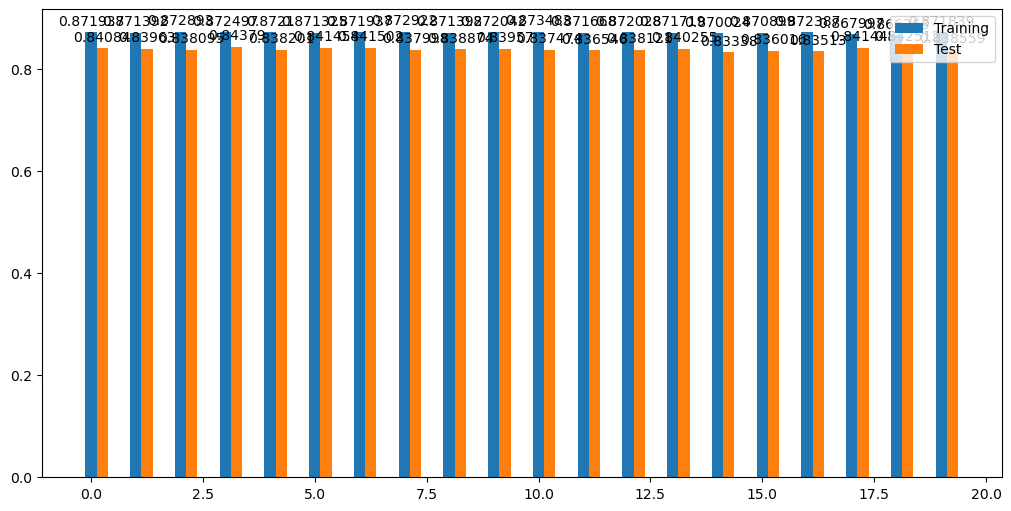

In [3]:
# AdaBoost case study
n_to_test = 20
col_list = []
vals = {}
avg_train_metric = np.zeros((n_to_test,))
avg_val_metric = np.zeros((n_to_test,))

for i in range(n_to_test):
    n_folds = 2
    kf = KFold(n_splits=n_folds, shuffle=True)
    if i == 19:
        [X_train,Y_train,X_test,ID_test] = Collection.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')
        col = 'all'
    else:
        [X_train,Y_train,X_test,ID_test,col] = Collection4.parse_telecom_data(filename_train='train.csv',filename_test='test.csv',entry_to_delete=i)
    train_Metric = 0
    val_Metric = 0
    for train_idx, val_idx in kf.split(X_train[:,0]):
        x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
        y_train, y_val = Y_train[train_idx], Y_train[val_idx]

        clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.55)
        clf.fit(x_train, y_train.flatten())
        
        y_train_prob = clf.predict_proba(x_train)
        thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1])
        train_Metric += thisMetric

        y_train_prob = clf.predict_proba(x_val)
        thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1])
        val_Metric += thisMetric

    avg_train_metric[i] = train_Metric/n_folds
    avg_val_metric[i] = val_Metric/n_folds
    col_list.append(col)

vals['Training'] = avg_train_metric
vals['Test'] = avg_val_metric
x = np.arange(len(col_list))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,5))

for attribute, measurement in vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
ax.set_ylim([.8,.9])
ax.set_ylabel('AUC Score')
ax.set_xlabel('feature removed')
ax.set_title('Training and Test AUC scores vs. feature removal')
ax.set_xticks(x + width/2, col_list,rotation=-70)

plt.legend()
plt.show()

In [55]:
## Getting order of importance
a = np.where(avg_val_metric.flatten() > avg_val_metric[-1])

res = np.argsort(avg_val_metric)
print(res)
c = b[0]
for i in range(len(res)):
    idx = len(res) - i - 1
    idx_2 = res[idx]
    print(col_list[idx_2])


[14 16 15 11 10  7  2 12  4 19  8  9  1 13  0 17  5  6 18  3]
Dependents
TotalCharges
MultipleLines
PhoneService
MonthlyCharges
gender
StreamingMovies
SeniorCitizen
OnlineBackup
OnlineSecurity
all
tenure
StreamingTV
Partner
InternetService
DeviceProtection
TechSupport
PaperlessBilling
PaymentMethod
Contract


In [2]:
i = 4
[X_train,Y_train,X_test,ID_test,col] = Collection4.parse_telecom_data(filename_train='train.csv',filename_test='test.csv',entry_to_delete=i)
res = np.where(np.isnan(X_train)==True)
res
X_train[630,38]


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Discontinued'],
      dtype='object')
column to delete  tenure
['customerID', 'InternetService', 'Contract', 'MonthlyCharges', 'TotalCharges']
['MonthlyCharges', 'TotalCharges']


0.0

## Adaboost case study

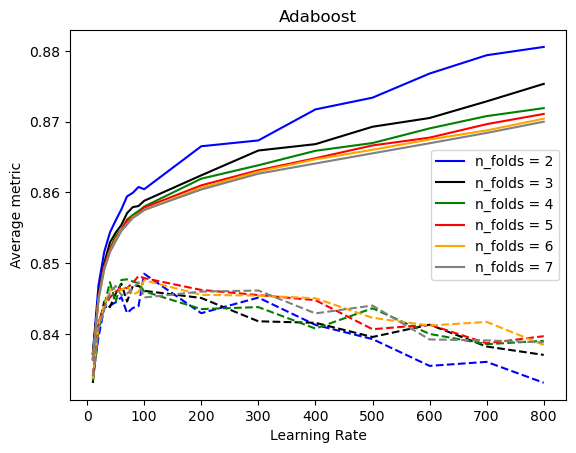

In [ ]:
# AdaBoost case study
n_est_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800]
learn_rate_list = [200]
c = ['b', 'k', 'g', 'r', 'orange','gray']
n_list = [2,3,4,5,6,7]
fig, ax = plt.subplots()
for i,n_folds in enumerate(n_list):
    kf = KFold(n_splits=n_folds, shuffle=True)
    for lr in (learn_rate_list):
        avg_train_metric = np.zeros((len(n_est_list),))
        avg_val_metric = np.zeros((len(n_est_list),))
        avg_full_metric = np.zeros((len(n_est_list),))
        for j,n_est in enumerate(n_est_list):
            train_Metric = 0
            val_Metric = 0
            y_train_prob_avg = 0

            for train_idx, val_idx in kf.split(X_train[:,0]):
                x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
                y_train, y_val = Y_train[train_idx], Y_train[val_idx]

                clf = AdaBoostClassifier(n_estimators=lr, learning_rate=n_est/800)
                clf.fit(x_train, y_train.flatten())
                
                y_train_prob = clf.predict_proba(x_train)
                thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1])
                train_Metric += thisMetric

                y_train_prob = clf.predict_proba(x_val)
                thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1])
                val_Metric += thisMetric

                y_train_prob = clf.predict_proba(X_train)
                y_train_prob_avg += y_train_prob[:,1]

            avg_train_metric[j] = train_Metric/n_folds
            avg_val_metric[j] = val_Metric/n_folds
            avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)

        ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'n_folds = {n_folds}')
        ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Average metric')
plt.title('Adaboost')

plt.legend()
plt.show()

## Adaboost Collection

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds)    
i = 0
train_Metric = 0
val_Metric = 0
y_train_prob_avg = 0
y_test_prob_avg = 0

for train_idx, val_idx in kf.split(X_train[:,0]):
    print(f'--------------- k-fold {i} ---------------')
    x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
    y_train, y_val = Y_train[train_idx], Y_train[val_idx]

    clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.55)
    clf.fit(x_train, y_train.flatten())
    
    y_prob = clf.predict_proba(x_train)
    thisMetric = metrics.roc_auc_score(y_train, y_prob[:,1])
    train_Metric += thisMetric
    print("Training metric: ",thisMetric)

    y_prob = clf.predict_proba(x_val)
    thisMetric = metrics.roc_auc_score(y_val, y_prob[:,1])
    val_Metric += thisMetric
    print("Testing metric: ",thisMetric)

    y_train_prob = clf.predict_proba(X_train)
    y_train_prob_avg += y_train_prob[:,1]

    y_test_prob = clf.predict_proba(X_test)
    y_test_prob_avg += y_test_prob[:,1]
    print(' ')

    i += 1

print(f'Average training metric: {train_Metric/n_folds}')
print(f'Average testing metric: {val_Metric/n_folds}')
thisMetric = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)
print(f'Full training metric: {thisMetric}')

y_test_prob = y_test_prob_avg/n_folds
thisData = np.concatenate((ID_test, np.reshape(y_test_prob,(-1,1))), axis=1)
thisLabel = ['ID','TARGET']
y_test_prob_pd = pd.DataFrame(data=thisData,columns=thisLabel)
fname_submit = 'test_submission_Ethan.csv'
y_test_prob_pd.to_csv(fname_submit,index=False)

--------------- k-fold 0 ---------------
Training metric:  0.8659412716096984
Testing metric:  0.8468412653712568
 
--------------- k-fold 1 ---------------
Training metric:  0.861392560582952
Testing metric:  0.8595707998729639
 
--------------- k-fold 2 ---------------
Training metric:  0.8664652349256236
Testing metric:  0.841431480295917
 
--------------- k-fold 3 ---------------
Training metric:  0.8700047627623342
Testing metric:  0.8255358041103765
 
--------------- k-fold 4 ---------------
Training metric:  0.8618047826032693
Testing metric:  0.8584433429847377
 
Average training metric: 0.8651217224967755
Average testing metric: 0.8463645385270503
Full training metric: 0.8621421283616327
